# **House Sales in King County, USA** 

PROBLEM STATEMENT:

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


*PRICE VS SQUARE FOOTAGE OF THE HOME*

REGRESSION PLOT FOR PRICE VS SQFT OF HOME 

In [223]:
# importing modules and the file 
import pandas as pd 
import numpy as np
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
dff=pd.read_csv(file_name) # dff is the dataframe containing the data for the house price prediction project

In [224]:
dff.head() #displays 5 datasets 

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [225]:
dff.describe() #displays the entire set 

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [226]:

dff.drop(["id"],inplace=True,axis=1)
dff.drop(["Unnamed: 0"],inplace=True,axis=1)


In [227]:
dff.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


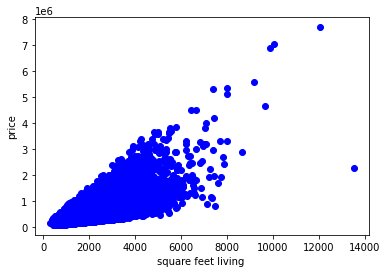

In [228]:
import matplotlib.pyplot as plt #for plotting the graph
import pandas as pd
import numpy as np
%matplotlib inline
plt.scatter( dff.sqft_living,dff.price,  color='blue') # plotting graph 
plt.ylabel("price")
plt.xlabel("square feet living ")
plt.show()

In [229]:
cdf=dff[['price','sqft_living','sqft_basement','sqft_lot','sqft_above','yr_built']] #extracting the required fields w another variable 
cdf.head(10)

,price,sqft_living,sqft_basement,sqft_lot,sqft_above,yr_built
0,221900.0,1180,0,5650,1180,1955
1,538000.0,2570,400,7242,2170,1951
2,180000.0,770,0,10000,770,1933
3,604000.0,1960,910,5000,1050,1965
4,510000.0,1680,0,8080,1680,1987
5,1225000.0,5420,1530,101930,3890,2001
6,257500.0,1715,0,6819,1715,1995
7,291850.0,1060,0,9711,1060,1963
8,229500.0,1780,730,7470,1050,1960
9,323000.0,1890,0,6560,1890,2003


In [230]:
from sklearn.model_selection import train_test_split
X_t,X_test,y_t,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4); #splitting the sets into training and testing sets on 80:20 ratio

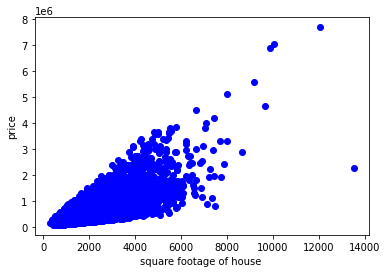

In [231]:
plt.scatter( X_t.sqft_living, X_t.price, color='blue')
plt.ylabel("price")
plt.xlabel("square footage of house ")
plt.show()

In [232]:
from sklearn import linear_model
regr = linear_model.LinearRegression() #storing the linear regression function with another smaller variable
t_y = np.asanyarray(X_t[['price']])
t_x = np.asanyarray(X_t[['sqft_living']])
regr.fit(t_x, t_y) # on solving we get the coeff and theb intercept 
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
a=regr.coef_[0,0]
b=regr.intercept_[0]
print(f"equation of line : y=({a})*x{b}")

Coefficients:  [[281.83375216]]
Intercept:  [-45850.76735561]
equation of line : y=(281.83375216000024)*x-45850.76735560526


In [233]:
display(dff)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


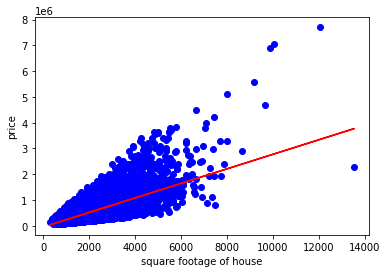

In [234]:
plt.scatter( X_t.sqft_living,X_t.price,  color='blue')
plt.plot(t_x, regr.coef_[0][0]*t_x + regr.intercept_[0], '-r')
plt.ylabel("price")
plt.xlabel("square footage of house")
plt.show()

In [258]:
test_y = np.asanyarray(X_test[['price']])
test_x = np.asanyarray(X_test[['sqft_living']])
test_y_ = regr.predict(test_x) # .predict is a keyword from the scikit model. with the help of predict we are finding the mean 
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error(MAE): " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error(MAE):  16.601084488608688
Residual sum of squares (MSE):  10152223.290567826


 
CONCLUSIONS/INFERENCE:
*   We get a Correlation between price and square footage of house.
*   With the increase in x variable y is also increasing , therefore it a positive coefficient.
*   The MAE is 8 , which infers the accuracy. Values closer to 0 being the most accurate. 




**PRICE VS SQUARE FOOTAGE OF LOT**


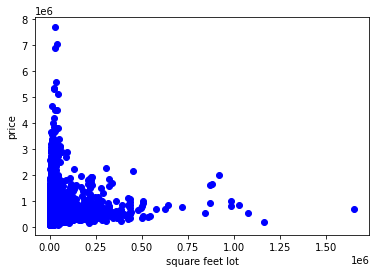

In [236]:
import matplotlib.pyplot as plt #for plotting the graph
import pandas as pd
import numpy as np
%matplotlib inline
plt.scatter( dff.sqft_lot,dff.price,  color='blue') # plotting graph 
plt.ylabel("price")
plt.xlabel("square feet lot")
plt.show()

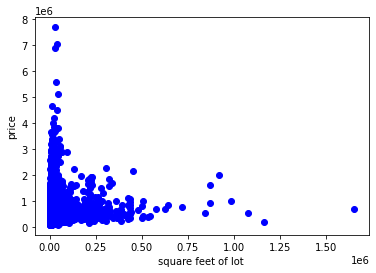

In [237]:
#SPLITTING THE SET INTO TRAINING AND TESTING SET IN RATIO 80:20
from sklearn.model_selection import train_test_split
X_t,X_test,y_t,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4); 
plt.scatter( X_t.sqft_lot, X_t.price, color='blue')
plt.ylabel("price")
plt.xlabel("square feet of lot ")
plt.show()

In [238]:
#EVALUATING THE LINEAR REGRESSION COEFFIECIENT AND INTERCEPT 
from sklearn import linear_model
regr = linear_model.LinearRegression() #storing the linear regression function with another smaller variable
t_y = np.asanyarray(X_t[['price']])
t_x = np.asanyarray(X_t[['sqft_lot']])
regr.fit(t_x, t_y) # on solving we get the coeff and theb intercept 
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
a=regr.coef_[0,0]
b=regr.intercept_[0]
print(f"equation of line : y=({a})*x{b}")


Coefficients:  [[0.7739767]]
Intercept:  [528081.1404475]
equation of line : y=(0.7739766990185454)*x528081.140447502


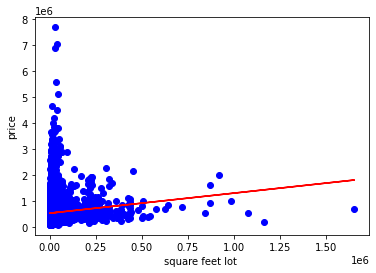

In [239]:
#PLOTTING 
plt.scatter( X_t.sqft_lot,X_t.price,  color='blue')
plt.plot(t_x, regr.coef_[0][0]*t_x + regr.intercept_[0], '-r')
plt.ylabel("price")
plt.xlabel("square feet lot ")
plt.show()

In [240]:
#CALCULATING THE ERROR
test_y = np.asanyarray(X_test[['price']])
test_x = np.asanyarray(X_test[['sqft_lot']])
test_y_ = regr.predict(test_x) # .predict is a keyword from the scikit model. with the help of predict we are finding the mean 
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  10.625294828936248
Residual sum of squares (MSE):  5927072.61627958


CONCLUSIONS/INFERENCE:
*   We get a Correlation between price and square footage of Lot.
*   With the increase in x variable y is also increasing , therefore it a positive coefficient.
*   The MAE is 10 , which infers the accuracy. Values closer to 0 being the most accurate.

**PRICE VS SQUARE FOOTAGE OF THE HOUSE APART FROM BASEMENT (SQFT ABOVE)**

In [241]:
import matplotlib.pyplot as plt #for plotting the graph
import pandas as pd
import numpy as np
%matplotlib inline

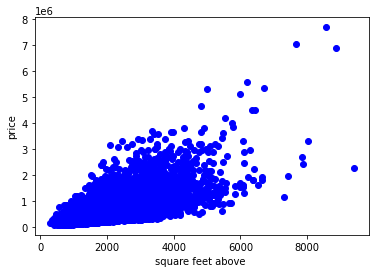

In [242]:
plt.scatter( dff.sqft_above,dff.price,  color='blue') # plotting graph 
plt.ylabel("price")
plt.xlabel("square feet above ")
plt.show()

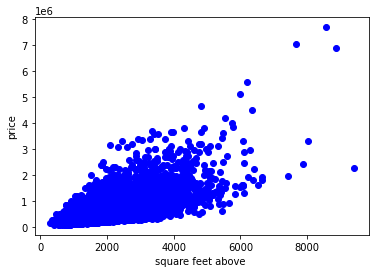

In [243]:
#SPLITTING THE SET INTO TRAINING AND TESTING SET IN RATIO 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);
plt.scatter( X_train.sqft_above, X_train.price, color='blue')
plt.ylabel("price")
plt.xlabel("square feet above ")
plt.show()

In [244]:
#EVALUATING THE LINEAR REGRESSION COEFFIECIENT AND INTERCEPT
from sklearn import linear_model
regr = linear_model.LinearRegression() #storing the linear regression function with another smaller variable
train_y = np.asanyarray(X_train[['price']])
train_x = np.asanyarray(X_train[['sqft_above']])
regr.fit(train_x, train_y) # on solving we get the coeff and theb intercept 
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
a=regr.coef_[0,0]
b=regr.intercept_[0]
print(f"equation of line : y=({a})*x{b}")

Coefficients:  [[271.07584553]]
Intercept:  [55969.4706309]
equation of line : y=(271.0758455293887)*x55969.47063090012


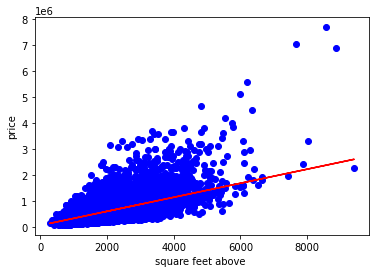

In [245]:
plt.scatter( X_train.sqft_above,X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.ylabel("price")
plt.xlabel("square feet above ")
plt.show()

In [246]:
#CALCULATING THE ERROR
test_y = np.asanyarray(X_test[['price']])
test_x = np.asanyarray(X_test[['sqft_above']])
test_y_ = regr.predict(test_x) # .predict is a keyword from the scikit model. with the help of predict we are finding the mean 
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  8.886516225680174
Residual sum of squares (MSE):  3861690.58196073


CONCLUSIONS/INFERENCE:
*   We get a Correlation between price and square footage of the house apart from basement.
*   With the increase in x variable y is also increasing , therefore it a positive coefficient.
*   The MAE is 8 , which infers the accuracy. Values closer to 0 being the most accurate.

**PRICE VS SQAURE FOOTAGE OF BASEMENT**

In [247]:
import matplotlib.pyplot as plt #for plotting the graph
import pandas as pd
import numpy as np
%matplotlib inline

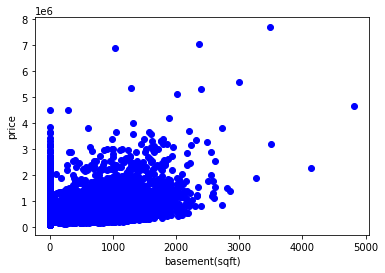

In [248]:
plt.scatter( dff.sqft_basement,dff.price,  color='blue') # plotting graph 
plt.ylabel("price")
plt.xlabel("basement(sqft)")
plt.show()

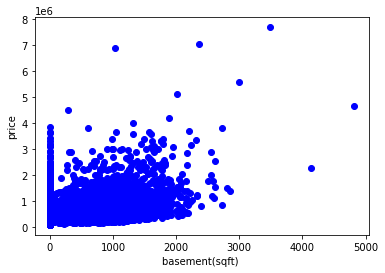

In [249]:
#SPLITTING THE SET INTO TRAINING AND TESTING SET IN RATIO 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);
plt.scatter( X_train.sqft_basement, X_train.price, color='blue')
plt.ylabel("price")
plt.xlabel("basement(sqft) ")
plt.show()

In [250]:
#EVALUATING THE LINEAR REGRESSION COEFFIECIENT AND INTERCEPT
from sklearn import linear_model
regr = linear_model.LinearRegression() #storing the linear regression function with another smaller variable
train_y = np.asanyarray(X_train[['price']])
train_x = np.asanyarray(X_train[['sqft_basement']])
regr.fit(train_x, train_y) # on solving we get the coeff and theb intercept 
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
a=regr.coef_[0,0]
b=regr.intercept_[0]
print(f"equation of line : y=({a})*x{b}")


Coefficients:  [[273.29121377]]
Intercept:  [459646.53758894]
equation of line : y=(273.2912137743181)*x459646.5375889449


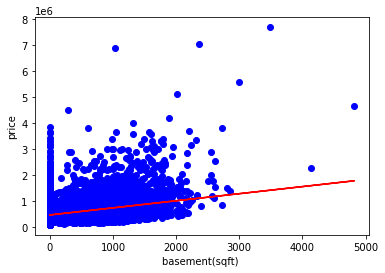

In [251]:
plt.scatter( X_train.sqft_basement,X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.ylabel("price")
plt.xlabel("basement(sqft) ")
plt.show()

In [252]:
#CALCULATING THE ERROR
test_y = np.asanyarray(X_test[['price']])
test_x = np.asanyarray(X_test[['sqft_basement']])
test_y_ = regr.predict(test_x) # .predict is a keyword from the scikit model. with the help of predict we are finding the mean 
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  10.299508809345143
Residual sum of squares (MSE):  5427892.6349292


CONCLUSIONS/INFERENCE:
*   We get a Correlation between price and square footage of basement.
*   With the increase in x variable y is also increasing , therefore it a positive coefficient.
*   The MAE is 10 , which infers the accuracy. Values closer to 0 being the most accurate.

*PRICE VS YEAR BUILT *

In [253]:
import matplotlib.pyplot as plt #for plotting the graph
import pandas as pd
import numpy as np
%matplotlib inline


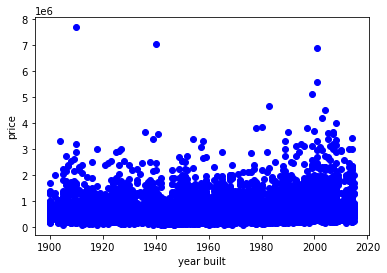

In [254]:
#SPLITTING THE SET INTO TRAINING AND TESTING SET IN RATIO 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);
plt.scatter( X_train.yr_built, X_train.price, color='blue')
plt.ylabel("price")
plt.xlabel("year built")
plt.show()

In [255]:
#EVALUATING THE LINEAR REGRESSION COEFFIECIENT AND INTERCEPT
from sklearn import linear_model
regr = linear_model.LinearRegression() #storing the linear regression function with another smaller variable
train_y = np.asanyarray(X_train[['price']])
train_x = np.asanyarray(X_train[['yr_built']])
regr.fit(train_x, train_y) # on solving we get the coeff and theb intercept 
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
a=regr.coef_[0,0]
b=regr.intercept_[0]
print(f"equation of line : y=({a})*x{b}")

Coefficients:  [[697.1750466]]
Intercept:  [-834300.80646315]
equation of line : y=(697.1750465952957)*x-834300.8064631472


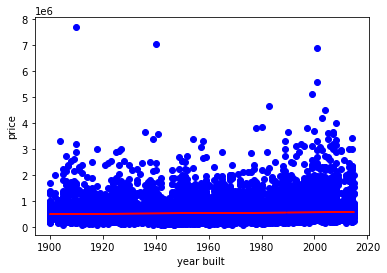

In [256]:
plt.scatter( X_train.yr_built,X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.ylabel("price")
plt.xlabel("year built ")
plt.show()

In [257]:
#CALCULATING THE ERROR
test_y = np.asanyarray(X_test[['price']])
test_x = np.asanyarray(X_test[['yr_built']])
test_y_ = regr.predict(test_x) # .predict is a keyword from the scikit model. with the help of predict we are finding the mean 
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  10.717044686716456
Residual sum of squares (MSE):  5971218.483604367


**FINAL CONCLUSION**:

According to the paramaters which i have taken into consideration for estimating the price of the house , we got the least Mean absolute error (MAE) of 8.01 for price vs SQFT_LIVING.